## 1.Business Problem.


### 1.1 Business Objective

Predict the price of computers based on their specifications and features.

### 1.2 Constraints

Limited dataset size, potential multicollinearity, and outliers affecting the model.

In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score


In [4]:
df = pd.read_csv("Computer_Data.csv")
df

,Unnamed: 0,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1,1499,25,80,4,14,no,no,yes,94,1
1,2,1795,33,85,2,14,no,no,yes,94,1
2,3,1595,25,170,4,15,no,no,yes,94,1
3,4,1849,25,170,8,14,no,no,no,94,1
4,5,3295,33,340,16,14,no,no,yes,94,1
...,...,...,...,...,...,...,...,...,...,...,...
6254,6255,1690,100,528,8,15,no,no,yes,39,35
6255,6256,2223,66,850,16,15,yes,yes,yes,39,35
6256,6257,2654,100,1200,24,15,yes,no,yes,39,35
6257,6258,2195,100,850,16,15,yes,no,yes,39,35


In [5]:
# Drop the index column
df.drop(columns=['Unnamed: 0'], inplace=True)

In [6]:
#Display  basic information
df.info

<bound method DataFrame.info of       price  speed    hd  ram  screen   cd multi premium  ads  trend
0      1499     25    80    4      14   no    no     yes   94      1
1      1795     33    85    2      14   no    no     yes   94      1
2      1595     25   170    4      15   no    no     yes   94      1
3      1849     25   170    8      14   no    no      no   94      1
4      3295     33   340   16      14   no    no     yes   94      1
...     ...    ...   ...  ...     ...  ...   ...     ...  ...    ...
6254   1690    100   528    8      15   no    no     yes   39     35
6255   2223     66   850   16      15  yes   yes     yes   39     35
6256   2654    100  1200   24      15  yes    no     yes   39     35
6257   2195    100   850   16      15  yes    no     yes   39     35
6258   2490    100   850   16      17  yes    no     yes   39     35

[6259 rows x 10 columns]>

In [7]:
df.head()

,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1499,25,80,4,14,no,no,yes,94,1
1,1795,33,85,2,14,no,no,yes,94,1
2,1595,25,170,4,15,no,no,yes,94,1
3,1849,25,170,8,14,no,no,no,94,1
4,3295,33,340,16,14,no,no,yes,94,1


In [8]:
# Encode categorical variables
le = LabelEncoder()
for col in ['cd', 'multi', 'premium']:
    df[col] = le.fit_transform(df[col])


## # 3. Data Pre-processing

### 3.1 Data Cleaning and Feature Engineering

In [24]:
# Check for missing values
print(df.isnull().sum())


price      0
speed      0
hd         0
ram        0
screen     0
cd         0
multi      0
premium    0
ads        0
trend      0
dtype: int64


### 3.2 Outlier Treatment

In [10]:
# 3.2 Outlier Treatment
for col in ['price', 'speed', 'hd', 'ram', 'screen', 'ads', 'trend']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

### 4. Exploratory Data Analysis (EDA)

In [11]:
# 4.1 Summary Statistics
print(df.describe())

             price        speed           hd          ram       screen  \
count  6259.000000  6259.000000  6259.000000  6259.000000  6259.000000   
mean   2215.569819    52.011024   411.458859     7.448155    14.560313   
std     567.196275    21.157735   242.175055     3.899872     0.780728   
min     949.000000    25.000000    80.000000     2.000000    14.000000   
25%    1794.000000    33.000000   214.000000     4.000000    14.000000   
50%    2144.000000    50.000000   340.000000     8.000000    14.000000   
75%    2595.000000    66.000000   528.000000     8.000000    15.000000   
max    3796.500000   100.000000   999.000000    14.000000    16.500000   

                cd        multi      premium          ads        trend  
count  6259.000000  6259.000000  6259.000000  6259.000000  6259.000000  
mean      0.464611     0.139479     0.902221   221.301007    15.926985  
std       0.498786     0.346474     0.297040    74.835284     7.873984  
min       0.000000     0.000000     0.000

###  4.2 Univariate Analysis

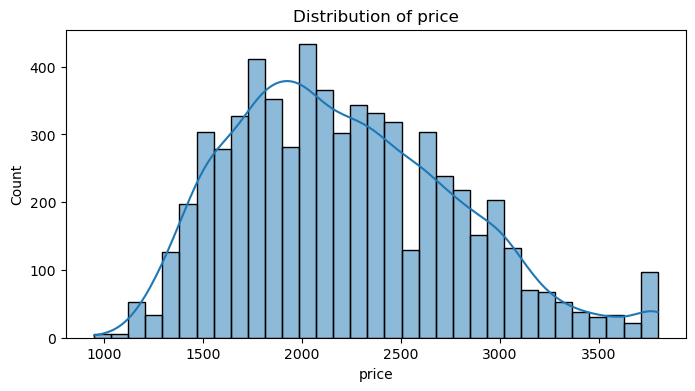

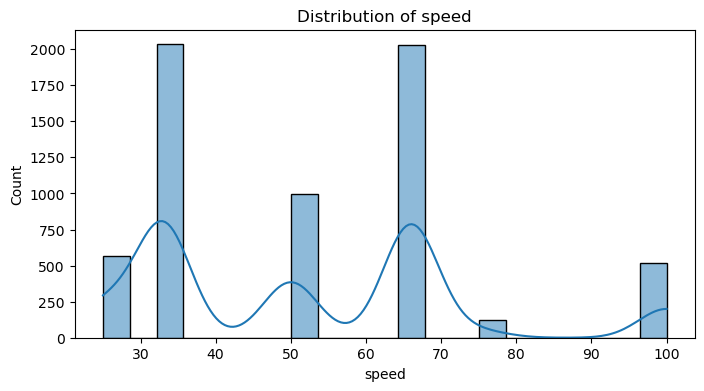

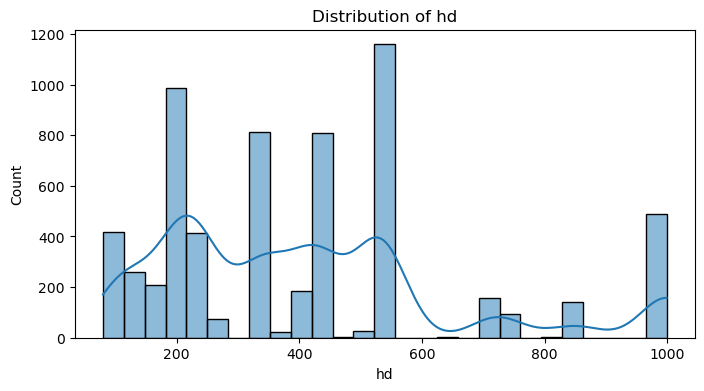

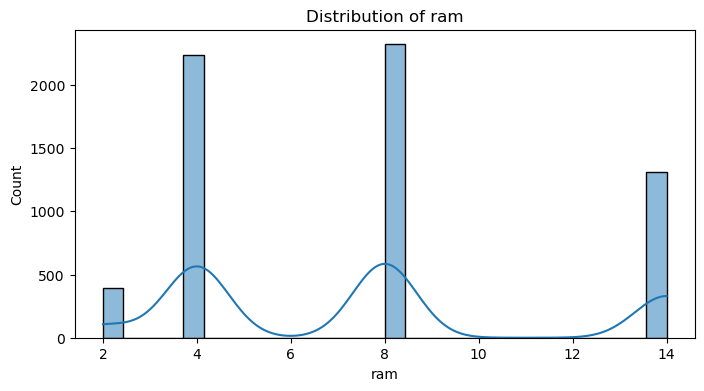

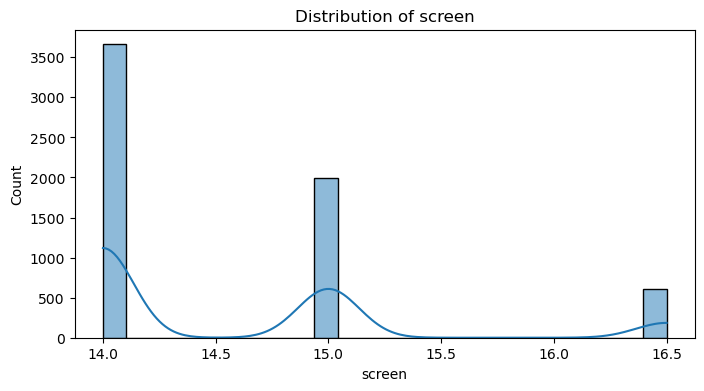

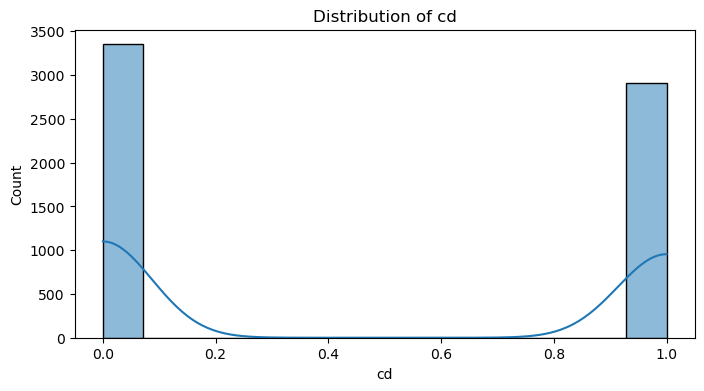

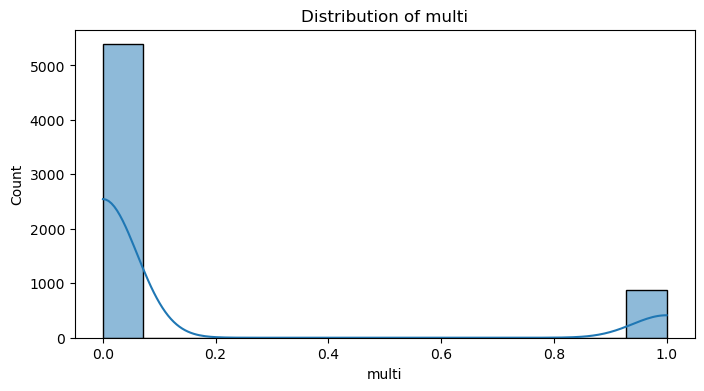

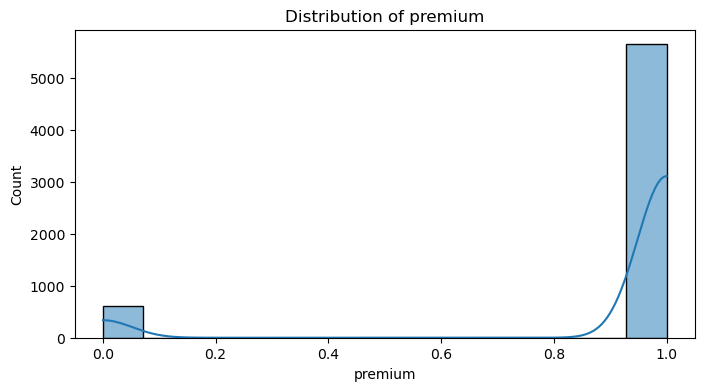

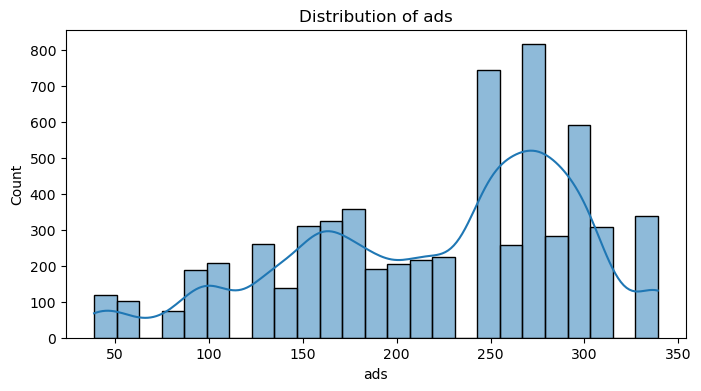

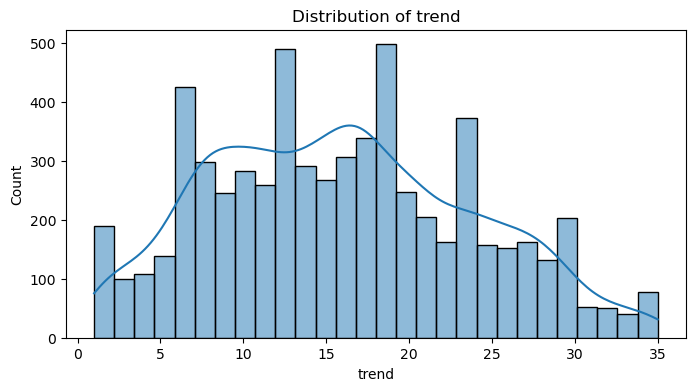

In [12]:
for col in df.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

### 4.3 Bivariate Analysis

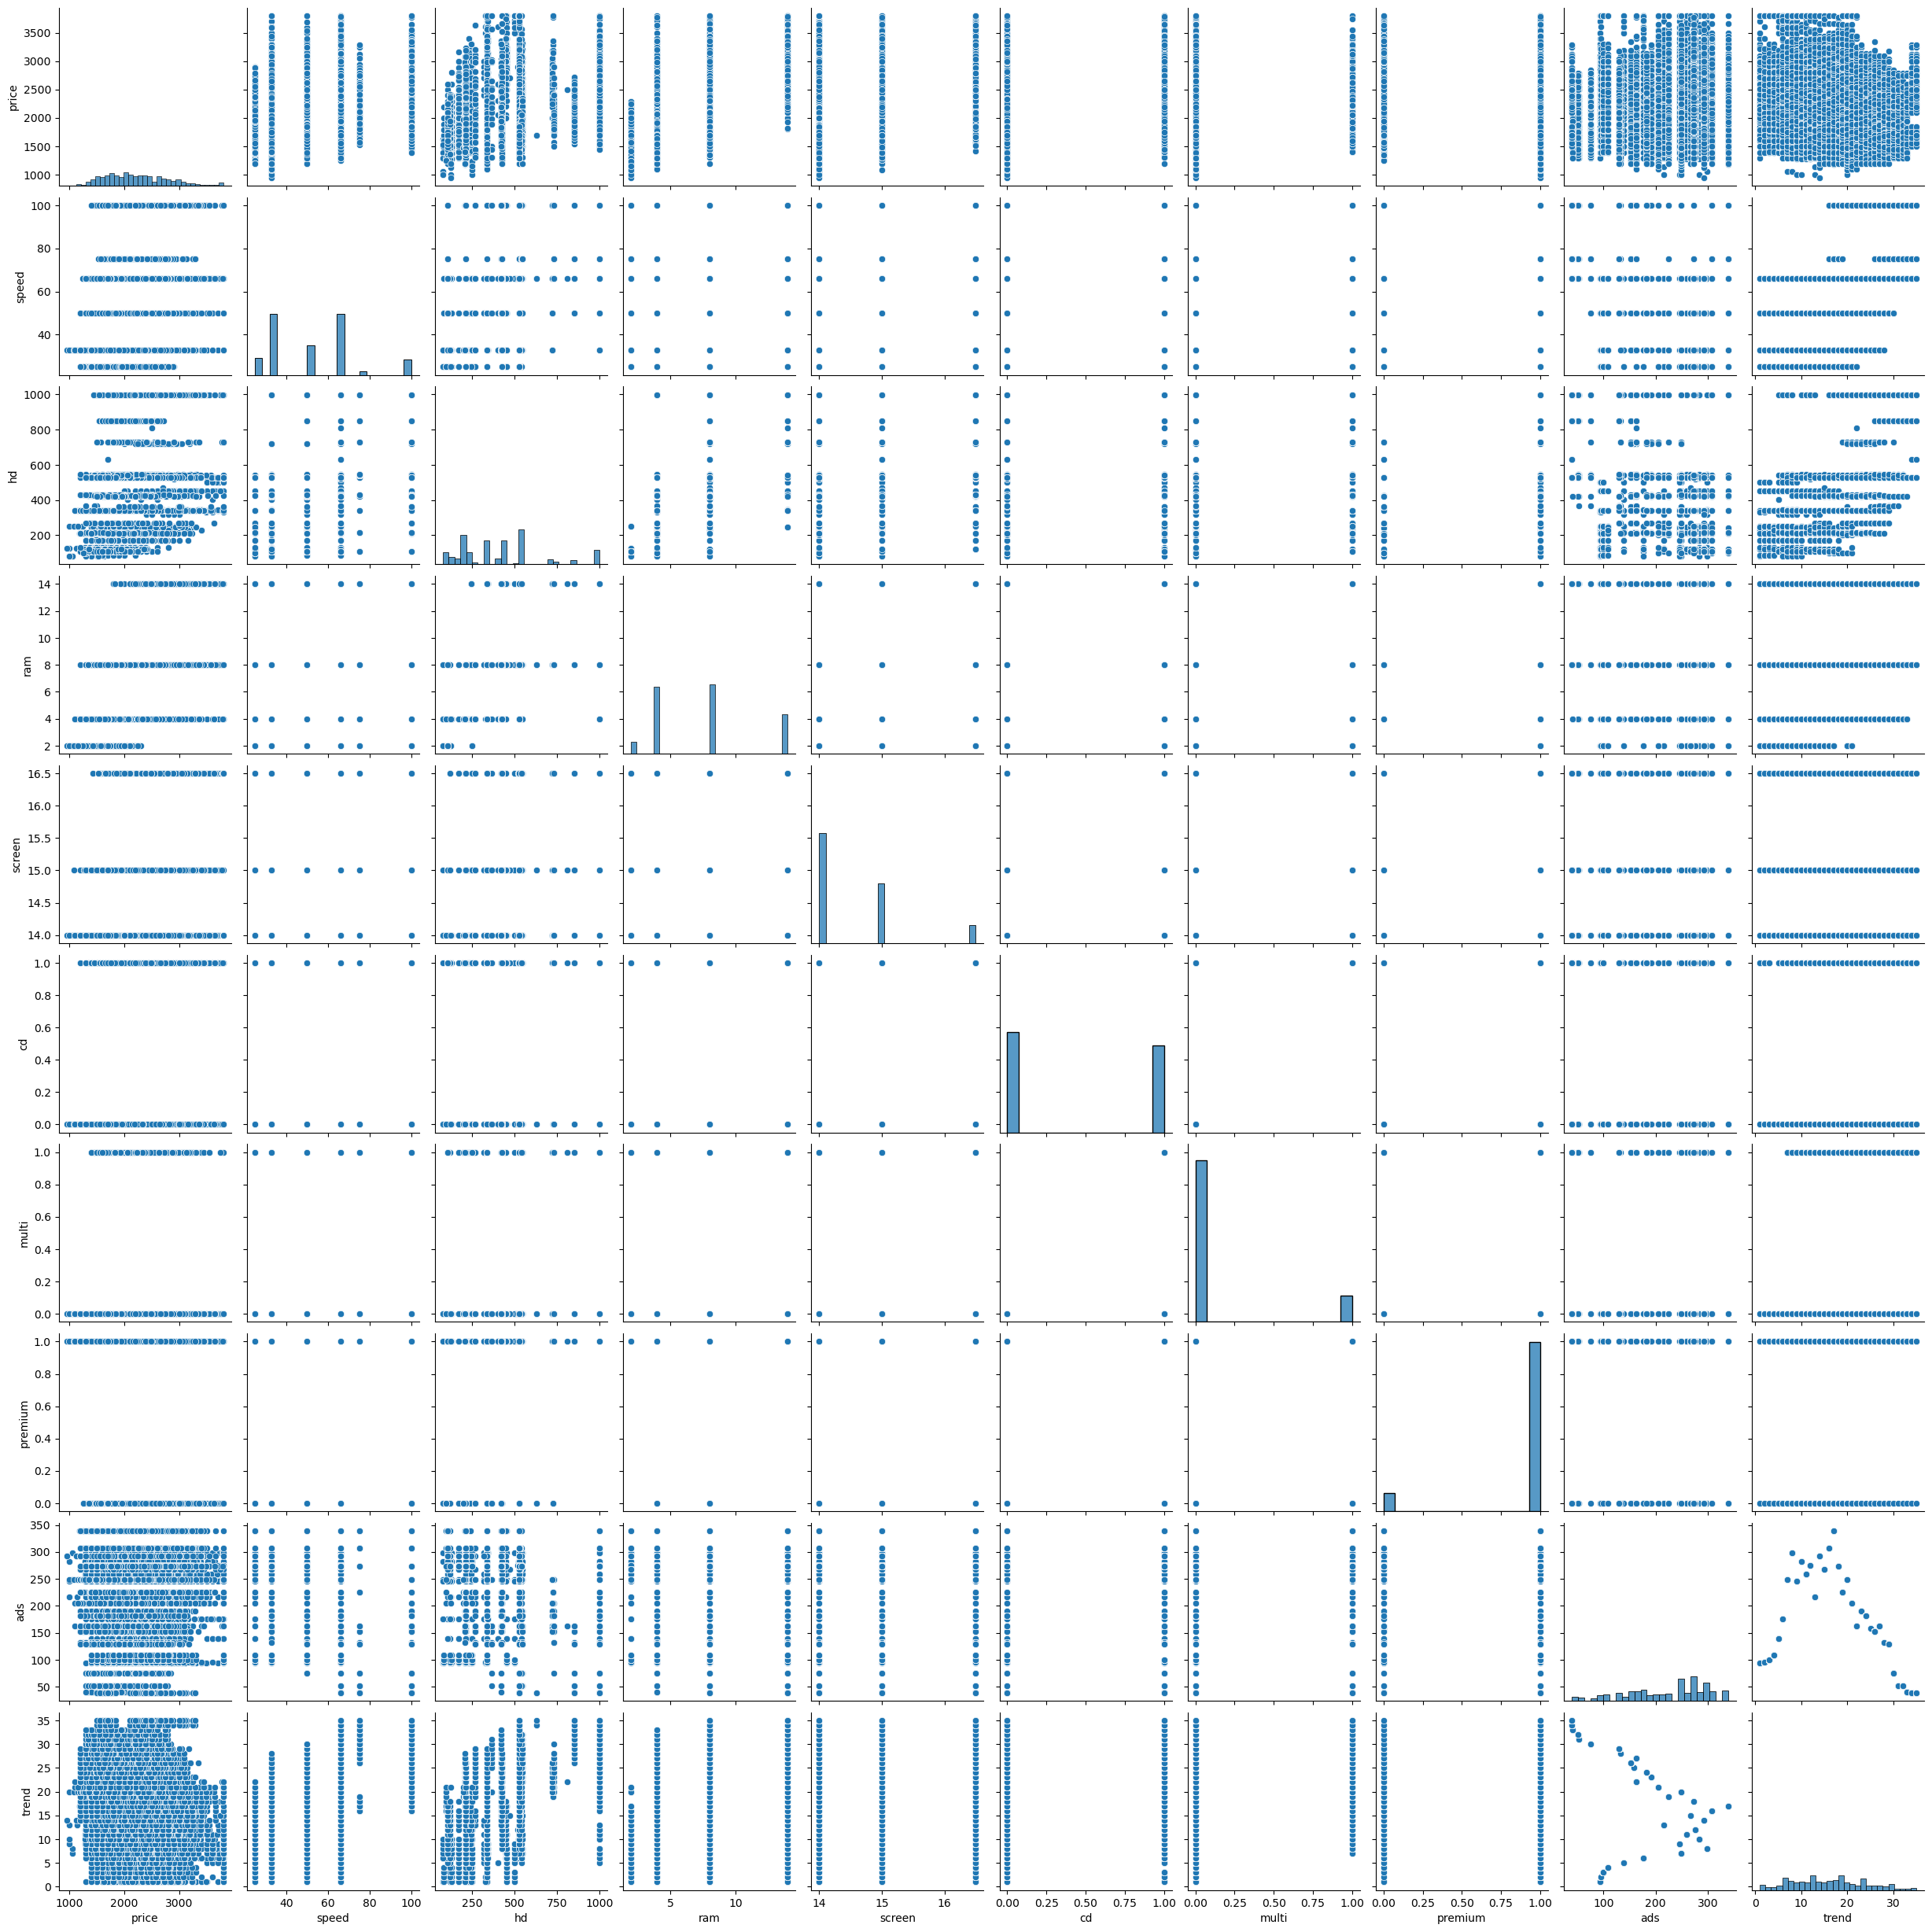

In [13]:
sns.pairplot(df)
plt.show()

###  5. Model Building

### 5.1 Prepare data for modeling

In [27]:
X = df.drop('price', axis=1)
y = df['price']

In [16]:
# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### # 5.2 Check for Multicollinearity using VIF

In [17]:

vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]
print(vif_data)


   Feature       VIF
0    speed  1.269912
1       hd  3.854617
2      ram  2.681628
3   screen  1.100338
4       cd  1.902028
5    multi  1.292187
6  premium  1.112766
7      ads  1.211660
8    trend  2.099842


In [18]:
# Split dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

### 5.3 Build Multi Linear Regression Model

In [19]:
X_train_sm = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_sm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     1803.
Date:                Thu, 13 Mar 2025   Prob (F-statistic):               0.00
Time:                        01:14:50   Log-Likelihood:                -30627.
No. Observations:                4381   AIC:                         6.127e+04
Df Residuals:                    4371   BIC:                         6.134e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2216.5720      3.979    557.107      0.0

In [20]:
# Evaluate the model
X_test_sm = sm.add_constant(X_test)
y_pred = model.predict(X_test_sm)

In [21]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

In [22]:
print("RMSE:", rmse)
print("R-squared:", r2)

RMSE: 269.2175160708978
R-squared: 0.7674565922753648


### 5.4 Residual Plot

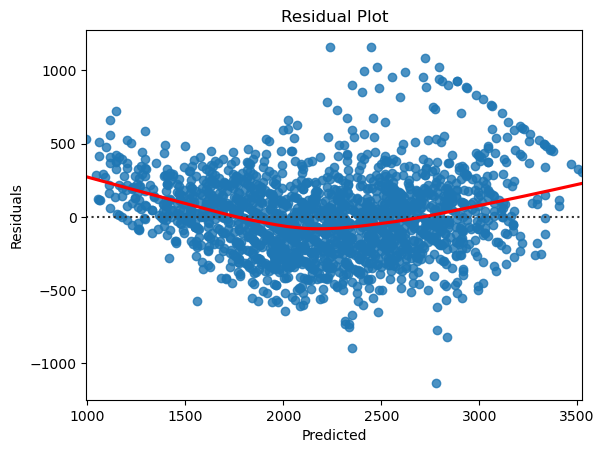

In [23]:
# 5.4 Residual Plot
sns.residplot(x=y_pred, y=(y_test - y_pred), lowess=True, line_kws={'color': 'red'})
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

### 6. Benefits/Impact of the Solution

This model helps in accurately predicting computer prices, optimizing pricing strategies, and improving inventory management for businesses.